In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
data=pd.read_csv('fakenews.csv')
data

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0
...,...,...
4981,The storybook romance of WWE stars John Cena a...,0
4982,The actor told friends he’s responsible for en...,0
4983,Sarah Hyland is getting real. The Modern Fami...,0
4984,Production has been suspended on the sixth and...,0


<Axes: xlabel='label'>

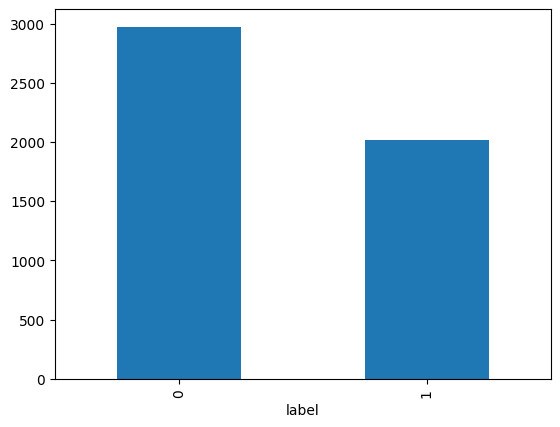

In [4]:
data.label.value_counts().plot(kind='bar')

In [5]:
# pre processing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text


In [6]:
data['txt_clean']=data.text.apply(preprocess_text)

In [7]:
data.head(2)

,text,label,txt_clean
0,Get the latest from TODAY Sign up for our news...,1,get latest today sign newsletter one ever trul...
1,2d Conan On The Funeral Trump Will Be Invited...,1,conan funeral trump invited conan tb


In [8]:
corpus=[i for i in data.txt_clean]
corpus

['get latest today sign newsletter one ever truly get losing loved one blake shelton exception older brother richie died nov shelton noted tweet monday changed life forever richie died car accident sheltons home state oklahoma two year ago shelton sent message th anniversary loss richie blake halfbrother shared mother passenger car collided school bus ada south oklahoma city richie driver redena mcmanus yearold boy christopher mcmanus died shortly collision bus driver passenger uninjured according police report accident clearly remained blake told minute remember picking phone call week dead tell something picking phone call tell something saw tv like constantly shock dead blake shelton playing today halloween extravaganza new york city oct getty image blake thenwife miranda lambert wrote single called inspired richie still two brother bonded despite age difference shared love country music bedroom right across hallway mine little blake said interview listening hank williams jr waylon 

In [9]:
data.drop('text',axis=1,inplace=True)

In [10]:
data.head(2)

,label,txt_clean
0,1,get latest today sign newsletter one ever trul...
1,1,conan funeral trump invited conan tb


## Bag of Words

- Assume we have 3 sentences
1. He is a good boy
2. She is a good girl
3. boy and girl are good 
- after preprocess the data
1. good boy
2. good girl
3. boy girl good
- corpus
 (good, boy, girl)

            |      | col1 | col2 | col3 |
            |      | good | boy  | girl |
            |  s1  |  1   |  1   |   0  |
            |  s1  |  1   |  0   |   1  |
            |  s1  |  1   |  1   |   1  |






In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(binary=True,ngram_range=(1,3),max_features=50000)

In [12]:
X=cv.fit_transform(corpus)
y=data.label

In [13]:
X.shape

(4986, 50000)

In [14]:
cv.vocabulary_

{'get': 17175,
 'latest': 23027,
 'today': 44526,
 'sign': 39242,
 'newsletter': 28706,
 'one': 29866,
 'ever': 13171,
 'truly': 45303,
 'losing': 24401,
 'loved': 24613,
 'blake': 4820,
 'shelton': 38767,
 'exception': 13438,
 'older': 29772,
 'brother': 5709,
 'richie': 35919,
 'died': 10788,
 'nov': 29208,
 'noted': 29138,
 'tweet': 45532,
 'monday': 27012,
 'changed': 6832,
 'life': 23481,
 'forever': 16065,
 'car': 6336,
 'accident': 173,
 'sheltons': 38773,
 'home': 19530,
 'state': 41169,
 'oklahoma': 29745,
 'two': 45613,
 'year': 49419,
 'ago': 920,
 'sent': 38233,
 'message': 26206,
 'th': 43326,
 'anniversary': 2129,
 'loss': 24405,
 'halfbrother': 18539,
 'shared': 38661,
 'mother': 27239,
 'passenger': 31201,
 'collided': 7778,
 'school': 37599,
 'bus': 5870,
 'ada': 648,
 'south': 40460,
 'city': 7359,
 'driver': 11618,
 'yearold': 49697,
 'boy': 5230,
 'christopher': 7280,
 'shortly': 38939,
 'collision': 7781,
 'according': 194,
 'police': 32729,
 'report': 35310,
 'cle

In [15]:
len(X[0].toarray()[0])

50000

In [16]:
print(data.txt_clean[0])
print(X[0].toarray()[0])

get latest today sign newsletter one ever truly get losing loved one blake shelton exception older brother richie died nov shelton noted tweet monday changed life forever richie died car accident sheltons home state oklahoma two year ago shelton sent message th anniversary loss richie blake halfbrother shared mother passenger car collided school bus ada south oklahoma city richie driver redena mcmanus yearold boy christopher mcmanus died shortly collision bus driver passenger uninjured according police report accident clearly remained blake told minute remember picking phone call week dead tell something picking phone call tell something saw tv like constantly shock dead blake shelton playing today halloween extravaganza new york city oct getty image blake thenwife miranda lambert wrote single called inspired richie still two brother bonded despite age difference shared love country music bedroom right across hallway mine little blake said interview listening hank williams jr waylon ly

### Train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
print(X_train.shape)
print(y_train.shape)

(3988, 50000)
(3988,)


In [19]:
print(X_test.shape)
print(y_test.shape)

(998, 50000)
(998,)


### Model building

In [20]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
NB.fit(X_train,y_train)

MultinomialNB()

In [21]:
predictions=NB.predict(X_test)

### Evaluaction metric

In [22]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(predictions,y_test))
f1_score((predictions,y_test)

SyntaxError: incomplete input (4106027398.py, line 3)

## TF-IDF

- TF - term frequencey
    - TF= no of times repeat of word in sentence / total words in sentence
    - probability of the word in the sentence
- IDF - inverce document frequencey
    - IDF= log2 (no of sentence / no of sentence containing that word)


- Assume we have 3 sentences
1. He is a good boy
2. She is a good girl
3. boy and girl are good 
- after preprocess the data
1. good boy
2. good girl
3. boy girl good
- corpus
 (good, boy, girl)

- TF

        |      | col1 | col2 | col3 |
        |      | good | boy  | girl |
        |  s1  | 1/2  | 1/2  |   0  |
        |  s1  | 1/2  |  0   |  1/2 |
        |  s1  | 1/3  | 1/3  |  1/3 |

- IDF

        |      |    col1   |  col2   | col3    |
        |      |   good    |  boy    |  girl   |
        | IDF  | log2(3/3) |log2(3/2)|log2(3/2)|

- TF-IDF  (TF * IDF)

        |      |      good       |       boy       |      girl       |
        |  s1  | 1/2 * log2(3/3) | 1/2 * log2(3/2) |   0 * log2(3/2) |
        |  s1  | 1/2 * log2(3/3) |  0 * log2(3/2)  |  1/2 * log2(3/2)|
        |  s1  | 1/3 * log2(3/3) | 1/3 * log2(3/2) |  1/3 * log2(3/2)|

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TF_IDF=TfidfVectorizer(max_features=50000,ngram_range=(1,3))

In [ ]:
X1=TF_IDF.fit_transform(corpus)

In [ ]:
data['txt_clean'][0]

'get latest today sign newsletter one ever truly get losing loved one blake shelton exception older brother richie died nov shelton noted tweet monday changed life forever richie died car accident sheltons home state oklahoma two year ago shelton sent message th anniversary loss richie blake halfbrother shared mother passenger car collided school bus ada south oklahoma city richie driver redena mcmanus yearold boy christopher mcmanus died shortly collision bus driver passenger uninjured according police report accident clearly remained blake told minute remember picking phone call week dead tell something picking phone call tell something saw tv like constantly shock dead blake shelton playing today halloween extravaganza new york city oct getty image blake thenwife miranda lambert wrote single called inspired richie still two brother bonded despite age difference shared love country music bedroom right across hallway mine little blake said interview listening hank williams jr waylon l

## train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X1,y,test_size=0.2,random_state=0)

In [ ]:
X_train_1.shape,y_train_1.shape

((3988, 50000), (3988,))

In [ ]:
X_test_1.shape,y_test_1.shape

((998, 50000), (998,))

# Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train_1,y_train_1)

RandomForestClassifier()

In [ ]:
predictions_1=RF.predict(X_test_1)

## Classification report

In [ ]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(predictions_1,y_test_1))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       688
           1       0.63      0.82      0.71       310

    accuracy                           0.80       998
   macro avg       0.77      0.80      0.78       998
weighted avg       0.82      0.80      0.80       998



In [ ]:
f1_score(predictions_1,y_test_1)

0.7134831460674157